# **projet 5** : Application d'un LRP sur un réseau de neurones entièrement connecté

Le but de ce projet est de comprendre le fonctionnement et l'intérêt d'un LRP (Layer-wise Relevance Propagation). Il s'agit d'une méthode utilisé pour comprendre et expliquer la prédiction d'un réseaux de neurones. On utilisera ici un réseaux de neurones entièrement connecté simple appliqué à des valeurs basiques pour pleinement comprendre le principe d'un LRP.
L’idée principale est de propager la "relevance" (importance) de la sortie finale Rk jusqu’aux entrées xi , en passant par chaque couche du réseau.

In [ ]:
################################################################################
# [0.] Installation des packages nécessaires ==================================
################################################################################

!pip3 install scipy
!pip3 install matplotlib

La sortie xk de la couche de sortie (k) correspond à la somme de toutes les entrées xj.
La relevance Rk du neurone dans cette couche est également égale à la somme de toutes ses entrées.

La sortie xj de chaque neurone dans la couche (j) (chacun étant indexé par j) est soit égale à zéro, soit à la somme des entrées pondérées plus le terme de biais.


$x_j = \max\left(0, \sum_i x_i w_{ij} + b_j \right) \\
R_k = x_k = \sum_j x_j$

La relevance de chaque neurone j dans la couche (j) est Rj.
Celle-ci peut être déduite à partir de l'équation qui calcule xj et de l'observation que le point de référence (x~) est égal à zéro.

$$
R_j = R_k(\tilde{\mathbf{x}}) + \frac{\partial R_k}{\partial x_j} \biggr\rvert_{\{ \tilde{x}_j \}} \cdot (x_j - \tilde{x}_j) = x_j = \max(0, \sum_i x_i w_{ij} + b_j)
$$

La relevance de chaque neurone i dans la couche (i), qui correspond en pratique à l'entrée, est Ri. Ce qui est important à souligner, c'est que la relevance est proportionnelle à la puissance des poids — en gardant à l'esprit que les poids peuvent être positifs ou négatifs.

$$
R_i = \sum_j \frac{w_{ij}^2}{\sum_{\acute{i}} w_{\acute{i}j}^2} R_j
$$

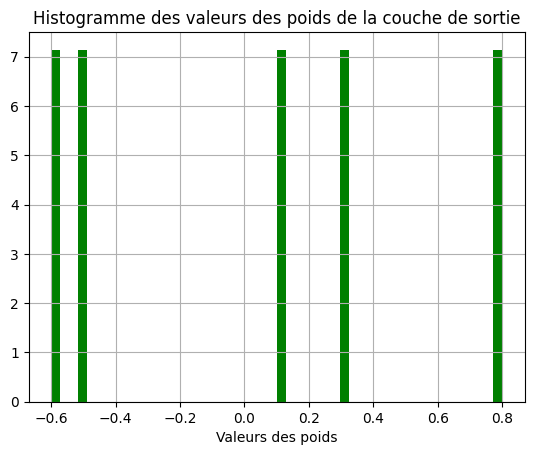

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

################################################################################
# [1.] On défini des entrées et des poids ======================================
# et on vérifie/regarde leur distribution dans un histogramme ==================
################################################################################

# i: couche d'entré, j: couche caché, k: couche de sortie

# 1.1. Valeur choisi aléatoirement -----------------------------------------
x_i_dict = {'x_1': 2, 'x_2': 9, 'x_3': -5}

w_j_1_dict = {'w_i1_j1': 0.1, 'w_i2_j1': -0.5, 'w_i3_j1': 0.6}
w_j_2_dict = {'w_i1_j2': -0.1, 'w_i2_j2': -0.3, 'w_i3_j2': -0.6}
w_j_3_dict = {'w_i1_j3': -0.5, 'w_i2_j3': 0.3, 'w_i3_j3': -0.8}
w_j_4_dict = {'w_i1_j4': 0.5, 'w_i2_j4': -0.9, 'w_i3_j4': 0.9}
w_j_5_dict = {'w_i1_j5': -0.1, 'w_i2_j5': -0.1, 'w_i3_j5': -0.1}

w_k_dict = {'w_j1_k1': 0.8, 'w_j2_k1': 0.1, 'w_j3_k1': -0.5,
            'w_j4_k1': -0.6, 'w_j5_k1': 0.3}


# Histogramme des poids ---------------------------------------------------------
n, bins, patches = plt.hist(w_k_dict.values(), 50, density=True, facecolor='g', alpha=1)


plt.xlabel('Valeurs des poids')
plt.title('Histogramme des valeurs des poids de la couche de sortie')
plt.grid(True)
plt.show()


L'objectif de la tâche est d'encourager l'utilisateur à sélectionner des valeurs d'entrée ainsi que des valeurs de poids de manière aléatoire ou intentionnelle, et d'observer comment la sortie des neurones, ainsi que les relevances, changent en fonction de ces modifications. Les variables "x_i_dict", "w_j_1_dict", ..., "w_j_5_dict", "w_k_dict" correspondent aux variables des équations mathématiques définies ci-dessus. Dans cet exemple, nous avons choisi une distribution aléatoire.


In [ ]:
################################################################################
# [2.] calcul de la propagation avant ==========================================
# On calcule la sortie du réseau de neurones  ==================================
################################################################################
sum_j1 = x_i_dict['x_1'] * w_j_1_dict['w_i1_j1'] + \
         x_i_dict['x_2'] * w_j_1_dict['w_i2_j1'] + \
         x_i_dict['x_3'] * w_j_1_dict['w_i3_j1']

sum_j2 = x_i_dict['x_1'] * w_j_2_dict['w_i1_j2'] + \
         x_i_dict['x_2'] * w_j_2_dict['w_i2_j2'] + \
         x_i_dict['x_3'] * w_j_2_dict['w_i3_j2']

sum_j3 = x_i_dict['x_1'] * w_j_3_dict['w_i1_j3'] + \
         x_i_dict['x_2'] * w_j_3_dict['w_i2_j3'] + \
         x_i_dict['x_3'] * w_j_3_dict['w_i3_j3']

sum_j4 = x_i_dict['x_1'] * w_j_4_dict['w_i1_j4'] + \
         x_i_dict['x_2'] * w_j_4_dict['w_i2_j4'] + \
         x_i_dict['x_3'] * w_j_4_dict['w_i3_j4']

sum_j5 = x_i_dict['x_1'] * w_j_5_dict['w_i1_j5'] + \
         x_i_dict['x_2'] * w_j_5_dict['w_i2_j5'] + \
         x_i_dict['x_3'] * w_j_5_dict['w_i3_j5']

# On applique ReLU -------------------------------------------------------------------
val_j1 = max(0, sum_j1)
val_j2 = max(0, sum_j2)
val_j3 = max(0, sum_j3)
val_j4 = max(0, sum_j4)
val_j5 = max(0, sum_j5)

# Calcul de la sortie du NN -------------------------------------------------
val_k1 = val_j1 + val_j2 + val_j3 + val_j4 + val_j5
print(f"Valeur de sortie du réseau: {val_k1}")


Valeur de sortie du réseau: 5.799999999999999


On calcul toute la propagation avant dans le NN, on applique le ReLU et on calcule la sortie finale du NN.

In [ ]:
################################################################################
# [3.] Calculer les pertinences de chaque neurone dans toutes les couches ======
# Les calculs de pertinences suivent les formules mathématiques définies
# ci-dessus.
################################################################################
################################################################################
# [3.1] définition de la pertinence finale =====================================
################################################################################
R_k = val_k1

print(f"Pertinance du neurone de la couche k: {R_k}")

################################################################################
# [3.2] Calculer la pertinence de chacun des 5 neurones de la couche (j) =======
################################################################################
R_j1 = val_j1
R_j2 = val_j2
R_j3 = val_j3
R_j4 = val_j4
R_j5 = val_j5

print(f"Pertinence des neurones de la couche j: {R_j1}, {R_j2}, {R_j3}, {R_j4}, {R_j5}")

################################################################################
# [3.3] Calculer la pertinence de chacun des 3 neurones de la couche (i) =======
################################################################################
sum_j1_power = w_j_1_dict['w_i1_j1'] ** 2 + \
               w_j_1_dict['w_i2_j1'] ** 2 + \
               w_j_1_dict['w_i3_j1'] ** 2

sum_j2_power = w_j_2_dict['w_i1_j2'] ** 2 + \
               w_j_2_dict['w_i2_j2'] ** 2 + \
               w_j_2_dict['w_i3_j2'] ** 2

sum_j3_power = w_j_3_dict['w_i1_j3'] ** 2 + \
               w_j_3_dict['w_i2_j3'] ** 2 + \
               w_j_3_dict['w_i3_j3'] ** 2

sum_j4_power = w_j_4_dict['w_i1_j4'] ** 2 + \
               w_j_4_dict['w_i2_j4'] ** 2 + \
               w_j_4_dict['w_i3_j4'] ** 2

sum_j5_power = w_j_5_dict['w_i1_j5'] ** 2 + \
               w_j_5_dict['w_i2_j5'] ** 2 + \
               w_j_5_dict['w_i3_j5'] ** 2

R_i1 = ((w_j_1_dict['w_i1_j1'] ** 2) / sum_j1_power) * R_j1 + \
       ((w_j_2_dict['w_i1_j2'] ** 2) / sum_j2_power) * R_j2 + \
       ((w_j_3_dict['w_i1_j3'] ** 2) / sum_j3_power) * R_j3 + \
       ((w_j_4_dict['w_i1_j4'] ** 2) / sum_j4_power) * R_j4 + \
       ((w_j_5_dict['w_i1_j5'] ** 2) / sum_j5_power) * R_j5

R_i2 = ((w_j_1_dict['w_i2_j1'] ** 2) / sum_j1_power) * R_j1 + \
       ((w_j_2_dict['w_i2_j2'] ** 2) / sum_j2_power) * R_j2 + \
       ((w_j_3_dict['w_i2_j3'] ** 2) / sum_j3_power) * R_j3 + \
       ((w_j_4_dict['w_i2_j4'] ** 2) / sum_j4_power) * R_j4 + \
       ((w_j_5_dict['w_i2_j5'] ** 2) / sum_j5_power) * R_j5

R_i3 = ((w_j_1_dict['w_i3_j1'] ** 2) / sum_j1_power) * R_j1 + \
       ((w_j_2_dict['w_i3_j2'] ** 2) / sum_j2_power) * R_j2 + \
       ((w_j_3_dict['w_i3_j3'] ** 2) / sum_j3_power) * R_j3 + \
       ((w_j_4_dict['w_i3_j4'] ** 2) / sum_j4_power) * R_j4 + \
       ((w_j_5_dict['w_i3_j5'] ** 2) / sum_j5_power) * R_j5


print(f"Pertinence des neurones de la couche i: {R_i1}, {R_i2}, {R_i3}")


Pertinance du neurone de la couche k: 5.799999999999999
Pertinence des neurones de la couche j: 0, 0.10000000000000009, 5.699999999999999, 0, 0
Pertinence des neurones de la couche i: 1.4562555456965391, 0.5430346051464062, 3.800709849157054


On peut voir ici la pertinence des neurones de chaque couche, on y voit que certains neurones ne sont pas utiles dans la couche j (1, 4, 5) tandis que le neurone 4 a une pertinence importante. De plus, dans la couche i, on remarque qu'en terme de pertinence, les neurones se comparent : 3 > 1 > 2.

Propriétés de positivité et de conservativité :
Pour chaque entrée x et chaque neurone p, la pertinence est positive.  
La somme des pertinences de tous les neurones dans la couche (i) est égale à la somme des pertinences de tous les neurones dans la couche (j)

$$
\forall \mathbf{x}, p : R_p(\mathbf{x}) \geq 0 \\
\sum_i R_i = \sum_j R_j
$$

In [ ]:
################################################################################
################################################################################
################################################################################
# [4.] Vérifier que les calculs de la pertinence sont obtenus ==================
# les propriétés de positivité et de conservation ==============================
# (voir cellule ci-dessus), à l'aide d'assertions et de tests unitaires ========
################################################################################
################################################################################
################################################################################


################################################################################
# [4.1] Vérification de la positivité ==========================================
################################################################################

assert R_k >= 0, "Pertinence de chaque neurone de chaque couche doit être positive"

assert R_j1 >=0, "Pertinence de chaque neurone de chaque couche doit être positive"
assert R_j2 >=0, "Pertinence de chaque neurone de chaque couche doit être positive"
assert R_j3 >=0, "Pertinence de chaque neurone de chaque couche doit être positive"
assert R_j4 >=0, "Pertinence de chaque neurone de chaque couche doit être positive"
assert R_j5 >=0, "Pertinence de chaque neurone de chaque couche doit être positive"

assert R_i1 >=0, "Pertinence de chaque neurone de chaque couche doit être positive"
assert R_i2 >=0, "Pertinence de chaque neurone de chaque couche doit être positive"
assert R_i3 >=0, "Pertinence de chaque neurone de chaque couche doit être positive"


################################################################################
# [4.2] Vérification de conservation ===========================================
################################################################################
sum_Rj = R_j1 + R_j2 + R_j3 + R_j4 + R_j5
print(f" Conservation j --to--> k: sum_Rj: {sum_Rj}, R_k: {R_k}")


sum_Ri = R_i1 + R_i2 + R_i3
print(f" Conservation i --to--> j: sum_Ri: {sum_Ri}, sum_Rj: {sum_Rj}")

 Conservation j --to--> k: sum_Rj: 5.799999999999999, R_k: 5.799999999999999
 Conservation i --to--> j: sum_Ri: 5.799999999999999, sum_Rj: 5.799999999999999


On a bien les propriétés de la positivité et de la conservation qui sont respectés.
Tout les neurones de toutes les couches sont positives et la somme de tous les neurones pour chaque couche sont égaux.

In [ ]:
import unittest

class TestLRPProperties(unittest.TestCase):

    def test_relevance_positivity(self):

        assert R_k >= 0, "Pertinence de chaque neurone de chaque couche doit être positive"

        assert R_j1 >=0, "Pertinence de chaque neurone de chaque couche doit être positive"
        assert R_j2 >=0, "Pertinence de chaque neurone de chaque couche doit être positive"
        assert R_j3 >=0, "Pertinence de chaque neurone de chaque couche doit être positive"
        assert R_j4 >=0, "Pertinence de chaque neurone de chaque couche doit être positive"
        assert R_j5 >=0, "Pertinence de chaque neurone de chaque couche doit être positive"

        assert R_i1 >=0, "Pertinence de chaque neurone de chaque couche doit être positive"
        assert R_i2 >=0, "Pertinence de chaque neurone de chaque couche doit être positive"
        assert R_i3 >=0, "Pertinence de chaque neurone de chaque couche doit être positive"


    def test_relevance_conservativity(self):
        self.assertEqual(R_k, R_j1 + R_j2 + R_j3 + R_j4 + R_j5)
        self.assertEqual(R_j1 + R_j2 + R_j3 + R_j4 + R_j5, R_i1 + R_i2 + R_i3)


unittest.main(argv=[''], verbosity=2, exit=False)

test_conservativity (__main__.TestLRPProperties) ... ok
test_positivity (__main__.TestLRPProperties) ... ok

----------------------------------------------------------------------
Ran 2 tests in 0.005s

OK


On a ici des tests unitaires pour vérifier les 2 propriétés défini avant.

On va tester les limites de robustesse des propriétés

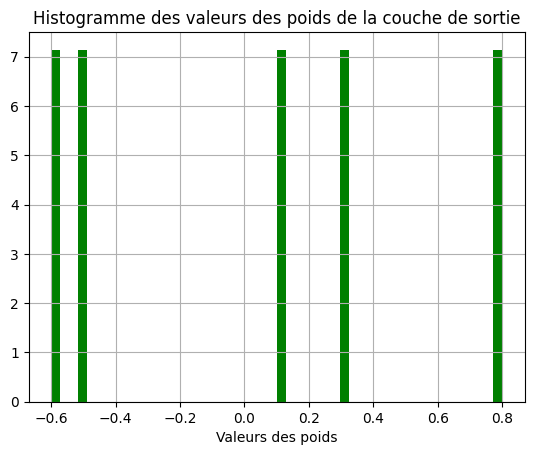

test_relevance_conservativity (__main__.TestLRPProperties.test_relevance_conservativity) ... ok
test_relevance_positivity (__main__.TestLRPProperties.test_relevance_positivity) ... ok

----------------------------------------------------------------------
Ran 2 tests in 0.011s

OK


Valeur de sortie du réseau: 1.6999999999999997
Pertinance du neurone de la couche k: 1.6999999999999997
Pertinence des neurones de la couche j: 0, 0, 1.6999999999999997, 0, 0
Pertinence des neurones de la couche i: 0.433673469387755, 0.1561224489795918, 1.110204081632653
 Conservation j --to--> k: sum_Rj: 1.6999999999999997, R_k: 1.6999999999999997
 Conservation i --to--> j: sum_Ri: 1.6999999999999997, sum_Rj: 1.6999999999999997


In [14]:
import numpy as np
import matplotlib.pyplot as plt

#En premier, on va tester avec une entrée nulle
x_i_dict = {'x_1': 2, 'x_2': 9, 'x_3': 0}


w_j_1_dict = {'w_i1_j1': -3, 'w_i2_j1': -0.5, 'w_i3_j1': 0.6}
w_j_2_dict = {'w_i1_j2': -0.1, 'w_i2_j2': -0.3, 'w_i3_j2': -0.6}
w_j_3_dict = {'w_i1_j3': -0.5, 'w_i2_j3': 0.3, 'w_i3_j3': -0.8}
w_j_4_dict = {'w_i1_j4': 0.5, 'w_i2_j4': -0.9, 'w_i3_j4': 0.9}
w_j_5_dict = {'w_i1_j5': -0.1, 'w_i2_j5': -0.1, 'w_i3_j5': -0.1}

w_k_dict = {'w_j1_k1': 0.8, 'w_j2_k1': 0.1, 'w_j3_k1': -0.5,
            'w_j4_k1': -0.6, 'w_j5_k1': 0.3}

#On test également avec w_i1_j1 en modifiant ce poids pour qu’il soit négatif et plus grand en valeur absolue que les autres.
w_j_1_dict['w_i1_j1'] = -2


n, bins, patches = plt.hist(w_k_dict.values(), 50, density=True, facecolor='g', alpha=1)

plt.xlabel('Valeurs des poids')
plt.title('Histogramme des valeurs des poids de la couche de sortie')
plt.grid(True)
plt.show()

################################################################################
# [2.] calcul de la propagation avant ==========================================
sum_j1 = x_i_dict['x_1'] * w_j_1_dict['w_i1_j1'] + \
         x_i_dict['x_2'] * w_j_1_dict['w_i2_j1'] + \
         x_i_dict['x_3'] * w_j_1_dict['w_i3_j1']

sum_j2 = x_i_dict['x_1'] * w_j_2_dict['w_i1_j2'] + \
         x_i_dict['x_2'] * w_j_2_dict['w_i2_j2'] + \
         x_i_dict['x_3'] * w_j_2_dict['w_i3_j2']

sum_j3 = x_i_dict['x_1'] * w_j_3_dict['w_i1_j3'] + \
         x_i_dict['x_2'] * w_j_3_dict['w_i2_j3'] + \
         x_i_dict['x_3'] * w_j_3_dict['w_i3_j3']

sum_j4 = x_i_dict['x_1'] * w_j_4_dict['w_i1_j4'] + \
         x_i_dict['x_2'] * w_j_4_dict['w_i2_j4'] + \
         x_i_dict['x_3'] * w_j_4_dict['w_i3_j4']

sum_j5 = x_i_dict['x_1'] * w_j_5_dict['w_i1_j5'] + \
         x_i_dict['x_2'] * w_j_5_dict['w_i2_j5'] + \
         x_i_dict['x_3'] * w_j_5_dict['w_i3_j5']

#On remplace ReLU par une fonction d'activation linéaire
#Vous pouvez faire le test en changeant max(0,sum_j1) en sum_j1
val_j1 = max(0, sum_j1)
val_j2 = max(0, sum_j2)
val_j3 = max(0, sum_j3)
val_j4 = max(0, sum_j4)
val_j5 = max(0, sum_j5)

val_k1 = val_j1 + val_j2 + val_j3 + val_j4 + val_j5
print(f"Valeur de sortie du réseau: {val_k1}")



# [3.] Calculer les pertinences de chaque neurone dans toutes les couches ======

# [3.1] définition de la pertinence finale =====================================
R_k = val_k1

print(f"Pertinance du neurone de la couche k: {R_k}")

# [3.2] Calculer la pertinence de chacun des 5 neurones de la couche (j) =======
R_j1 = val_j1
R_j2 = val_j2
R_j3 = val_j3
R_j4 = val_j4
R_j5 = val_j5

print(f"Pertinence des neurones de la couche j: {R_j1}, {R_j2}, {R_j3}, {R_j4}, {R_j5}")


# [3.3] Calculer la pertinence de chacun des 3 neurones de la couche (i) =======
sum_j1_power = w_j_1_dict['w_i1_j1'] ** 2 + \
               w_j_1_dict['w_i2_j1'] ** 2 + \
               w_j_1_dict['w_i3_j1'] ** 2

sum_j2_power = w_j_2_dict['w_i1_j2'] ** 2 + \
               w_j_2_dict['w_i2_j2'] ** 2 + \
               w_j_2_dict['w_i3_j2'] ** 2

sum_j3_power = w_j_3_dict['w_i1_j3'] ** 2 + \
               w_j_3_dict['w_i2_j3'] ** 2 + \
               w_j_3_dict['w_i3_j3'] ** 2

sum_j4_power = w_j_4_dict['w_i1_j4'] ** 2 + \
               w_j_4_dict['w_i2_j4'] ** 2 + \
               w_j_4_dict['w_i3_j4'] ** 2

sum_j5_power = w_j_5_dict['w_i1_j5'] ** 2 + \
               w_j_5_dict['w_i2_j5'] ** 2 + \
               w_j_5_dict['w_i3_j5'] ** 2

R_i1 = ((w_j_1_dict['w_i1_j1'] ** 2) / sum_j1_power) * R_j1 + \
       ((w_j_2_dict['w_i1_j2'] ** 2) / sum_j2_power) * R_j2 + \
       ((w_j_3_dict['w_i1_j3'] ** 2) / sum_j3_power) * R_j3 + \
       ((w_j_4_dict['w_i1_j4'] ** 2) / sum_j4_power) * R_j4 + \
       ((w_j_5_dict['w_i1_j5'] ** 2) / sum_j5_power) * R_j5

R_i2 = ((w_j_1_dict['w_i2_j1'] ** 2) / sum_j1_power) * R_j1 + \
       ((w_j_2_dict['w_i2_j2'] ** 2) / sum_j2_power) * R_j2 + \
       ((w_j_3_dict['w_i2_j3'] ** 2) / sum_j3_power) * R_j3 + \
       ((w_j_4_dict['w_i2_j4'] ** 2) / sum_j4_power) * R_j4 + \
       ((w_j_5_dict['w_i2_j5'] ** 2) / sum_j5_power) * R_j5

R_i3 = ((w_j_1_dict['w_i3_j1'] ** 2) / sum_j1_power) * R_j1 + \
       ((w_j_2_dict['w_i3_j2'] ** 2) / sum_j2_power) * R_j2 + \
       ((w_j_3_dict['w_i3_j3'] ** 2) / sum_j3_power) * R_j3 + \
       ((w_j_4_dict['w_i3_j4'] ** 2) / sum_j4_power) * R_j4 + \
       ((w_j_5_dict['w_i3_j5'] ** 2) / sum_j5_power) * R_j5


print(f"Pertinence des neurones de la couche i: {R_i1}, {R_i2}, {R_i3}")


# [4.] Vérifier que les calculs de la pertinence sont obtenus ==================

# [4.1] Vérification de la positivité ==========================================

assert R_k >= 0, "Pertinence de chaque neurone de chaque couche doit être positive"

assert R_j1 >=0, "Pertinence de chaque neurone de chaque couche doit être positive"
assert R_j2 >=0, "Pertinence de chaque neurone de chaque couche doit être positive"
assert R_j3 >=0, "Pertinence de chaque neurone de chaque couche doit être positive"
assert R_j4 >=0, "Pertinence de chaque neurone de chaque couche doit être positive"
assert R_j5 >=0, "Pertinence de chaque neurone de chaque couche doit être positive"

assert R_i1 >=0, "Pertinence de chaque neurone de chaque couche doit être positive"
assert R_i2 >=0, "Pertinence de chaque neurone de chaque couche doit être positive"
assert R_i3 >=0, "Pertinence de chaque neurone de chaque couche doit être positive"


# [4.2] Vérification de conservation ===========================================

sum_Rj = R_j1 + R_j2 + R_j3 + R_j4 + R_j5
print(f" Conservation j --to--> k: sum_Rj: {sum_Rj}, R_k: {R_k}")


sum_Ri = R_i1 + R_i2 + R_i3
print(f" Conservation i --to--> j: sum_Ri: {sum_Ri}, sum_Rj: {sum_Rj}")

import unittest

class TestLRPProperties(unittest.TestCase):

    def test_relevance_positivity(self):

        assert R_k >= 0, "Pertinence de chaque neurone de chaque couche doit être positive"

        assert R_j1 >=0, "Pertinence de chaque neurone de chaque couche doit être positive"
        assert R_j2 >=0, "Pertinence de chaque neurone de chaque couche doit être positive"
        assert R_j3 >=0, "Pertinence de chaque neurone de chaque couche doit être positive"
        assert R_j4 >=0, "Pertinence de chaque neurone de chaque couche doit être positive"
        assert R_j5 >=0, "Pertinence de chaque neurone de chaque couche doit être positive"

        assert R_i1 >=0, "Pertinence de chaque neurone de chaque couche doit être positive"
        assert R_i2 >=0, "Pertinence de chaque neurone de chaque couche doit être positive"
        assert R_i3 >=0, "Pertinence de chaque neurone de chaque couche doit être positive"


    def test_relevance_conservativity(self):
        self.assertEqual(R_k, R_j1 + R_j2 + R_j3 + R_j4 + R_j5)
        self.assertEqual(R_j1 + R_j2 + R_j3 + R_j4 + R_j5, R_i1 + R_i2 + R_i3)


unittest.main(argv=[''], verbosity=2, exit=False)


En testant avec une entrée nulle et un poids modifiée en négatif et valeur absolue plus grande que les autres, les tests unitaires passe sans problème, les propriétés sont donc respectés.
En revanche, si on change la fonction ReLU par une fonction linéaire, nous avons alors des pertinences négatives qui cassent les tests unitaires.